#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Mahvash\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Mahvash\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Mahvash\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Mahvash\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,1,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,1,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,1,Mr


In [5]:
print('__Test Dataset__')
test_df.head()

__Test Dataset__


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Data Dictionary

Variable Definition Key

survival Survival 0 = No, 1 = Yes

pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex Male or Female

Age Age in years

sibsp # of siblings / spouses aboard the Titanic

parch # of parents / children aboard the Titanic

ticket Ticket number

fare Passenger fare

cabin Cabin number

embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them

Defining **missing data function** for identifying missing data in the dataframe

In [6]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    #Sorting rows of a dataframe in descending order of NaN counts
    
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
    ms = ms[ms['Percent'] > 0]
    f, ax = plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig = sns.barplot(ms.index, ms['Percent'],color='green',alpha=0.8)
    plt.xlabel('Features',fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms      

#### Identifying missing data

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


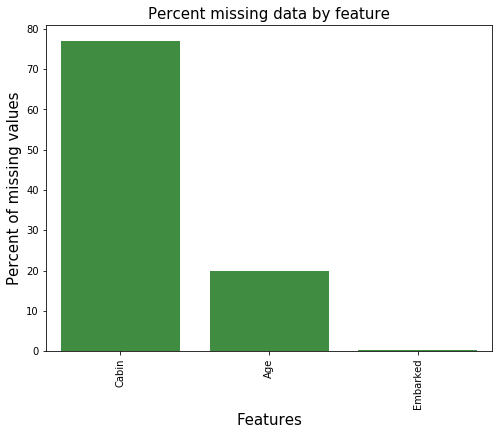

In [7]:
missingdata(train_df)

#### Filling missing values

In [9]:
# Average passenger age
test_df['Age'].mean()

30.272590361445783

I have learned that the most common technique in Data Cleaning is filling missing data. The missing data can be filled with Mode, Mean, or Median. Since there is no absolute rule on these choices, I try to choose one after another and see the performance. But have to know that I can only use **mode** for categorized data, and **median** or **mean** for continuous data.

In [11]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [12]:
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

Dropping the column 'Cabin' as it has more than 75% missing values.

In [13]:
drop_column = ['Cabin']

In [14]:
train_df.drop(drop_column, axis=1, inplace=True)
test_df.drop(drop_column, axis=1, inplace=True)

Checking the NaN values in train and test dataframes:

In [15]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [16]:
print(test_df.isnull().sum())

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


In [17]:
print('NaN values in Train Data')
print(train_df.isnull().sum())
print('___' *30)
print(test_df.isnull().sum())

NaN values in Train Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
__________________________________________________________________________________________
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


In [18]:
print('NaN values in Train Data')
print(train_df.isnull().sum())
print('___' *30)
print('NaN values in Test Data')
print(test_df.isnull().sum())

NaN values in Train Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
__________________________________________________________________________________________
NaN values in Test Data
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


#### FE

Merging the two data frames together, test and train:

In [19]:
all_data=[train_df,test_df]

Combining the two dataset and creating the FamilySize columsn with merging the columns 'SibSp', for Sibling/Spouse, and Parch for Parent/Child

In [20]:
# +1 is for the passenger themself
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 

Defining a function for extracting the titles from passenger names

In [21]:
import re
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    # if title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ""

# New feature Title, containing the title of the passenger
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

# Grouping all non-common 'Titles' in group 'Rare'
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')


Creating bins for age features with [*pandas.cut*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) method. 

In [24]:
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children', 'Teenage','Adult','Elder'])

Creating bins for *fare* features with [*pandas.cut*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) method. 

In [23]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.00,13,31,120],
                                 labels=['Low_Fare','Median_Fare','Average_Fare','High_Fare'])

In [25]:
#Making a copies of both data sets for our reference
traindf=train_df
testdf=test_df

In [26]:
#merging the two copied data sets
all_dat=[traindf,testdf]

In [27]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

Converted the categorical features to numerical by using dummy variables.

In [28]:
testdf.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Fare_bin,Age_bin
0,892,3,male,0,0,Q,1,Mr,Median_Fare,Adult
1,893,3,female,1,0,S,2,Mrs,Low_Fare,Elder
2,894,2,male,0,0,Q,1,Mr,Median_Fare,Elder
3,895,3,male,0,0,S,1,Mr,Median_Fare,Adult
4,896,3,female,1,1,S,3,Mrs,Median_Fare,Adult


The add_prefix() function is used to prefix labels with string prefix.

For **Series**, the row labels are *prefixed*. For **DataFrame**, the column labels are prefixed.

[Source](https://www.w3resource.com/pandas/series/series-add_prefix.php#:~:text=Prefix%20labels%20with%20string%20prefix,the%20column%20labels%20are%20prefixed.&text=The%20string%20to%20add%20before%20each%20label.)

In [29]:
traindf = pd.get_dummies(traindf,columns = ['Sex','Title','Age_bin','Embarked','Fare_bin'],
                        prefix=['Sex','Title','Age_type','Em_type','Fare_type'])

In [30]:
testdf = pd.get_dummies(testdf, columns=['Sex','Title','Age_bin','Embarked','Fare_bin'],
                       prefix=['Sex','Title','Age_type','Em_type','Fare_type'])

In [31]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_Fare,Fare_type_Median_Fare,Fare_type_Average_Fare,Fare_type_High_Fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [32]:
testdf.tail()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_Fare,Fare_type_Median_Fare,Fare_type_Average_Fare,Fare_type_High_Fare
413,1305,3,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
414,1306,1,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
415,1307,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
416,1308,3,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
417,1309,3,1,1,3,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Correlation between the features

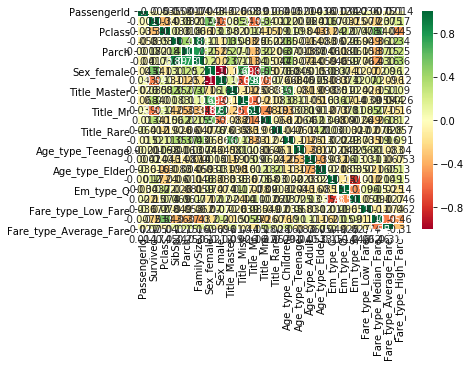

In [33]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [34]:
fig = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [35]:
fig.set_size_inches(20,12)

In [36]:
plt.show()

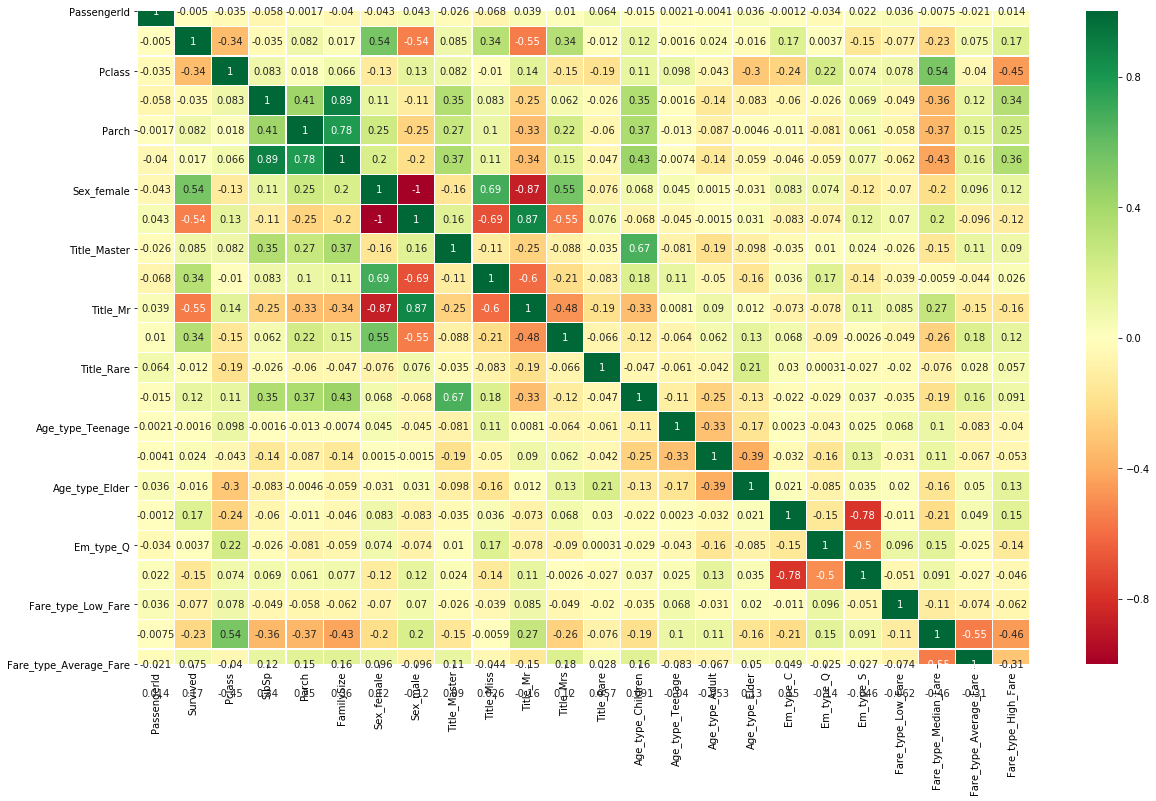

In [37]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

**Check the udemy notebooks for the code for fixing the cutoff part of the plot.**

#### Pairplots

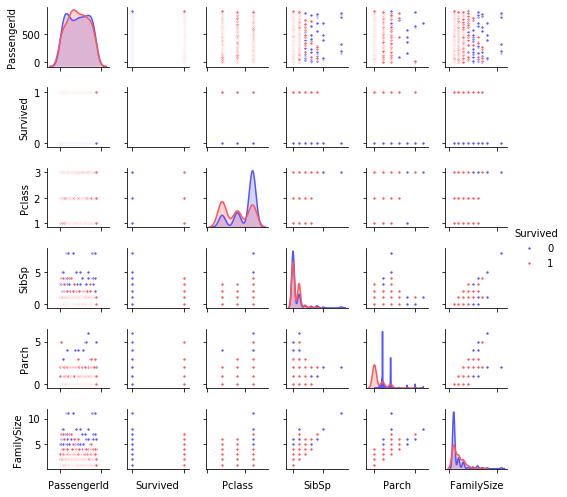

In [40]:
g = sns.pairplot(data=train_df,hue='Survived',palette='seismic',
                size = 1.2,diag_kind = 'kde',
                 diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

### Model Review

Importing the required libraries for the models.

In [44]:
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.metrics import accuracy_score # for accuracy score
from sklearn.model_selection import KFold # Useing for K-fold cross validation
from sklearn.model_selection import cross_val_score # for score evaluation
from sklearn.model_selection import cross_val_predict # for prediction
from sklearn.metrics import confusion_matrix # for Confusion Matrix

In [56]:
all_features = traindf.drop('Survived', axis=1)
Targeted_feature = traindf['Survived']
X_train, X_test, y_train, y_test = train_test_split(all_feature,Targeted_feature,test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 23), (268, 23), (623,), (268,))

#### 1. Logistic Regression

In [60]:
#Machine Learning
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression() # instantiaing the logistic regression model

In [49]:
model.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
prediction_lr = model.predict(X_test)

In [52]:
print('-'*18,'The Accuracy of the model','-'*18)

------------------ The Accuracy of the model ------------------


In [53]:
print('The accuracy of the Logistic Regression is', round(accuracy_score(prediction_lr,y_test)*100,2))

The accuracy of the Logistic Regression is 82.46


In [55]:
kfold = KFold(n_splits=10,random_state=22) # k=10, split the data into 10 equal parts

In [59]:
result_rm = cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')

Quick note: 
* *round method* in Python is a number method that returns x rounded to n digits from the decimal point.
[Source](https://www.tutorialspoint.com/python/number_round.htm)
* Check the *scoring* parameter Classification [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [61]:
print('The accuracy of the Logistic Regression is ', round(accuracy_score(prediction_lr,y_test)*100,2))

The accuracy of the Logistic Regression is  82.46


KFold Scikit-learn [guide](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) for reviewing the method and its parameters.

In [62]:
kfold = KFold(n_splits=10,random_state=22) # k=10, split the data into 10 equal parts

Cross-Validation [guide](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) from *scikit-learn* 

In [63]:
result_lr = cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')

In [70]:
print('The cross validated score for Logistic Regression is:', round(result_lr.mean()*100,2)) 

The cross validated score for Logistic Regression is: 82.61


In [65]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)

Seaborn heatmap parameters [guide](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0.5, 1.05, 'Confusion_matrix')

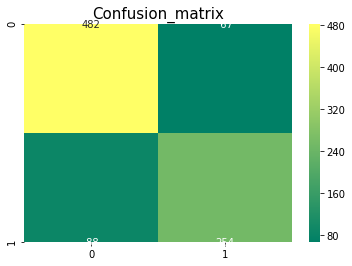

In [68]:
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 82.46
The cross validated score for Logistic REgression is: 82.61


Text(0.5, 1.05, 'Confusion_matrix')

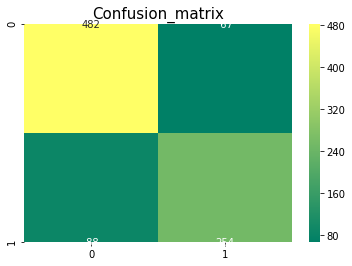

In [69]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)

print('--------------The Accuracy of the model----------------------------')

print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)

sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion_matrix', y=1.05, size=15)

Review the above function and code to be clear about the use of the methods. *June 4, 2020*

#### 2. Random Forest Classifier

Random Forest Classifier [Guide](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model = RandomForestClassifier(criterion='gini',n_estimators=700,min_samples_split=10, min_samples_leaf=1,
                               max_features='auto',oob_score=True,random_state=1,n_jobs=-1)

The number of jobs to run in parallel. 

* fit
* predict
* decision_path and 
* apply 

are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [75]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [76]:
prediction_rm = model.predict(X_test)

In [79]:
print('---------------The Accuracy of the model-------------------')

---------------The Accuracy of the model-------------------


In [80]:
print('The accuracy of teh Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))

The accuracy of teh Random Forest Classifier is 82.46


In [81]:
kfold = KFold(n_splits=10,random_state=22) # k=10 refers to splitting the data into 10 equal parts

In [83]:
result_rm = cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')

In [84]:
print('The cross validated score from Random Forest Classifier is:',round(result_rm.mean()*100,2))

The cross validated score from Random Forest Classifier is: 83.28


In [85]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)

Text(0.5, 1.05, 'Confusion_matrix')

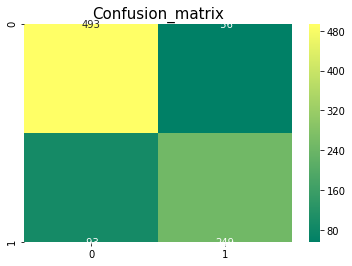

In [90]:
plt.xlim()
plt.ylim()
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap='summer')
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 61.57
The cross validated score for Support Vector Machines Classifier is: 53.08


Text(0.5, 1.05, 'Confusion_matrix')

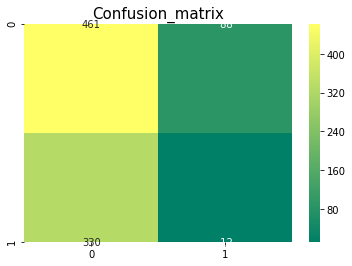

In [103]:
from sklearn.svm import SVC, LinearSVC
model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
plt.xlim()
plt.ylim()
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)